In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [99]:
#Linear Regression
diabetes = datasets.load_diabetes()
X = diabetes.data[:,np.newaxis,2]
y=diabetes.target

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [101]:
model = LinearRegression()

In [102]:
model.fit(X_train,y_train)

LinearRegression()

In [103]:
#predict the data
y_pred = model.predict(X_test)
#y_predict

In [104]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"mean squared error :{mse:.2f}")
print(f"r2 score: {r2:.2f}")

mean squared error :4150.68
r2 score: 0.19


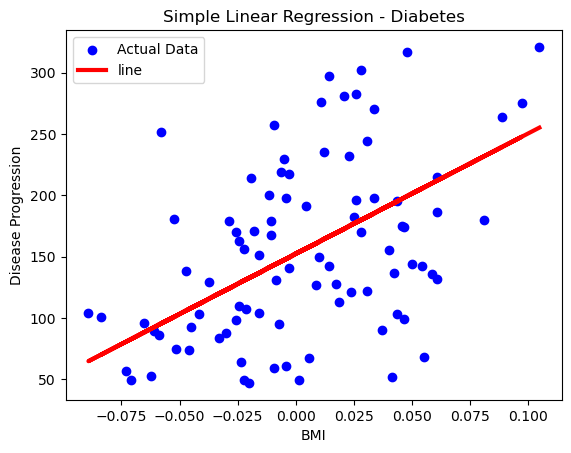

In [105]:
#plot the values
plt.scatter(X_test,y_test,color='blue',label='Actual Data')
plt.plot(X_test,y_pred,color='red',linewidth=3,label='line')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression - Diabetes")
plt.legend()
plt.show()

In [106]:
#Logistic Regression
#import the modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [107]:
data=datasets.load_iris()
X = data.data
y=data.target

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [109]:
l_model = LogisticRegression()

In [110]:
l_model.fit(X_train,y_train)

C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
y_predict = l_model.predict(X_test)

In [112]:
accu = accuracy_score(y_test,y_predict)
print(f"Accuracy: {accu}")

Accuracy: 1.0


In [113]:
conf_mat = confusion_matrix(y_test,y_predict)
print("Confusion matrix:")
print(conf_mat)

Confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [114]:
#Predict the value for the new values
new_data =np.array([
    [5.1,3.5,1.4,0.2],
    [6.2,2.8,4.8,1.8],
    [5.7,3.0,4.2,1.2]
])

new_predictions = l_model.predict(new_data)
new_predictions

array([0, 2, 1])

In [78]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [81]:
iris = datasets.load_iris()
X = iris.data[:,2:3]
y=iris.data[:,0]

In [83]:
deg = 2
poly_features = PolynomialFeatures(degree=deg)
X_poly = poly_features.fit_transform(X)

In [85]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly,y)

LinearRegression()

In [88]:
X_range = np.linspace(X.min(),X.max(),100).reshape(-1,1)
X_range_poly = poly_features.transform(X_range)

In [90]:
y_pred = poly_reg.predict(X_range_poly)

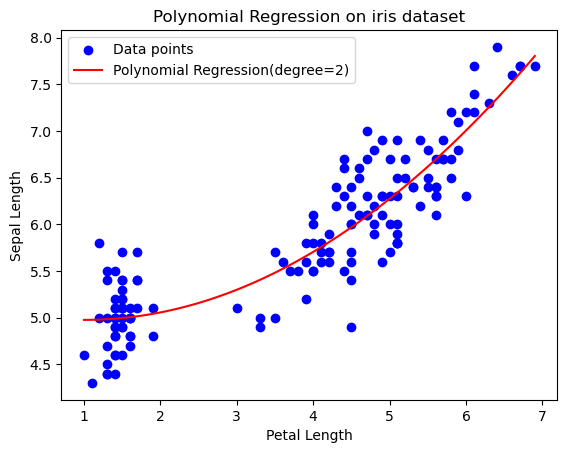

In [95]:
plt.scatter(X,y,label = 'Data points' ,color='blue')
plt.plot(X_range,y_pred,label=f'Polynomial Regression(degree={deg})', color='red')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Polynomial Regression on iris dataset')
plt.legend()
plt.show()